# Análises Preditivas

## Carregar dados

In [1]:
%pip install yfinance
import yfinance as yf

Note: you may need to restart the kernel to use updated packages.


<Axes: xlabel='Date'>

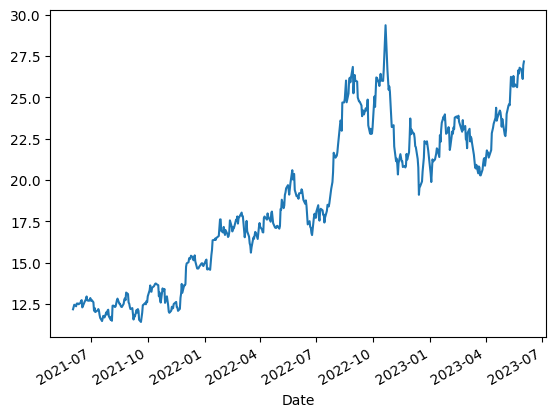

In [2]:
ticker = input('Digite o código da ação: ')
dados = yf.Ticker(ticker).history('2y')
dados['Close'].plot()

## Tratando dados para treinamento do modelo

In [3]:
dados.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-06-02 00:00:00-03:00,11.951576,12.266206,11.912247,12.178809,103985100,0.0,0.0
2021-06-04 00:00:00-03:00,12.261837,12.506550,12.200659,12.454111,102757300,0.0,0.0
2021-06-07 00:00:00-03:00,12.454110,12.475959,12.239986,12.362343,74548900,0.0,0.0
2021-06-08 00:00:00-03:00,12.309906,12.585207,12.218138,12.524029,88398600,0.0,0.0
2021-06-09 00:00:00-03:00,12.550248,12.707563,12.462851,12.524029,60724200,0.0,0.0


- Resetar o índice
- Selecionar colunas
- Remover fuso horário
- Renomear colunas

In [4]:
treinamento = dados.reset_index()
treinamento = treinamento[['Date', 'Close']]
treinamento['Date'] = treinamento['Date'].dt.tz_localize(None)
treinamento.columns = ['ds', 'y']
treinamento

,ds,y
0,2021-06-02,12.178809
1,2021-06-04,12.454111
2,2021-06-07,12.362343
3,2021-06-08,12.524029
4,2021-06-09,12.524029
...,...,...
495,2023-05-29,26.690001
496,2023-05-30,26.389999
497,2023-05-31,26.120001
498,2023-06-01,26.959999


# Treinando o modelo de Machine Learning

In [5]:
%pip install prophet
from prophet import Prophet
from prophet.plot import plot_plotly

c:\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
modelo = Prophet()
modelo.fit(treinamento)

18:38:29 - cmdstanpy - INFO - Chain [1] start processing
18:38:30 - cmdstanpy - INFO - Chain [1] done processing


# Realizar previsões

In [7]:
periodo = modelo.make_future_dataframe(90)
periodo.tail()

,ds
585,2023-08-27
586,2023-08-28
587,2023-08-29
588,2023-08-30
589,2023-08-31


In [8]:
previsoes = modelo.predict(periodo)
previsoes

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-06-02,15.446850,13.929922,15.766896,15.446850,15.446850,-0.669823,-0.669823,-0.669823,0.651797,0.651797,0.651797,-1.321620,-1.321620,-1.321620,0.0,0.0,0.0,14.777027
1,2021-06-04,15.312329,13.460329,15.280995,15.312329,15.312329,-0.950396,-0.950396,-0.950396,0.699421,0.699421,0.699421,-1.649817,-1.649817,-1.649817,0.0,0.0,0.0,14.361933
2,2021-06-07,15.110548,12.706550,14.531217,15.110548,15.110548,-1.460509,-1.460509,-1.460509,0.649961,0.649961,0.649961,-2.110470,-2.110470,-2.110470,0.0,0.0,0.0,13.650039
3,2021-06-08,15.043287,12.554902,14.351718,15.043287,15.043287,-1.583008,-1.583008,-1.583008,0.663360,0.663360,0.663360,-2.246368,-2.246368,-2.246368,0.0,0.0,0.0,13.460279
4,2021-06-09,14.976027,12.296061,14.192071,14.976027,14.976027,-1.718511,-1.718511,-1.718511,0.651797,0.651797,0.651797,-2.370309,-2.370309,-2.370309,0.0,0.0,0.0,13.257515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585,2023-08-27,29.578031,29.332626,32.636668,28.263285,31.057507,1.412577,1.412577,1.412577,-1.689653,-1.689653,-1.689653,3.102230,3.102230,3.102230,0.0,0.0,0.0,30.990607
586,2023-08-28,29.616655,31.799066,35.085432,28.280049,31.116282,3.770443,3.770443,3.770443,0.649961,0.649961,0.649961,3.120482,3.120482,3.120482,0.0,0.0,0.0,33.387098
587,2023-08-29,29.655279,31.765822,35.144406,28.277646,31.192836,3.791947,3.791947,3.791947,0.663360,0.663360,0.663360,3.128588,3.128588,3.128588,0.0,0.0,0.0,33.447227
588,2023-08-30,29.693904,31.789832,35.330262,28.282554,31.271632,3.778225,3.778225,3.778225,0.651797,0.651797,0.651797,3.126428,3.126428,3.126428,0.0,0.0,0.0,33.472128


# Visualizações gráficas

In [9]:
plot_plotly(modelo, previsoes)